Data Analysis and Application of Linear Regression on a Ecommerce company's Customer Data set

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('Ecommerce Customers')

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Exploratory Data Analysis

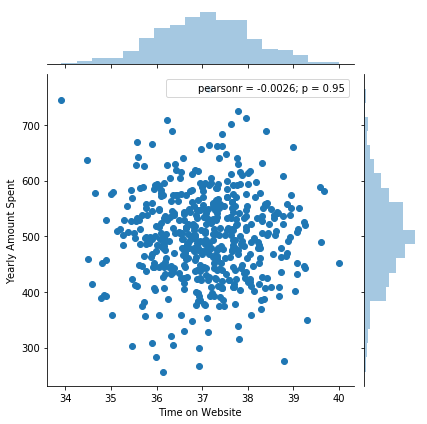

In [11]:
sns.jointplot(data=data,x=data['Time on Website'],y=data['Yearly Amount Spent'])

Time on website and yearly amount spent are not correlated.

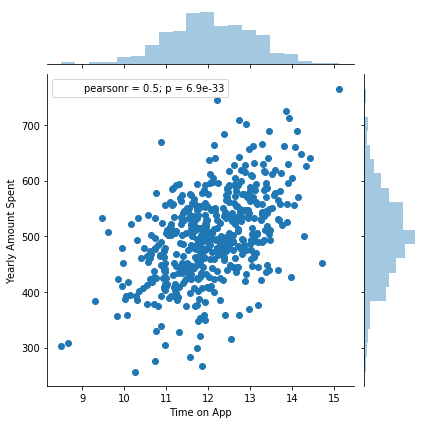

In [12]:
sns.jointplot(data=data,x=data['Time on App'],y=data['Yearly Amount Spent'])

Time on website and yearly amount spent are correlated.

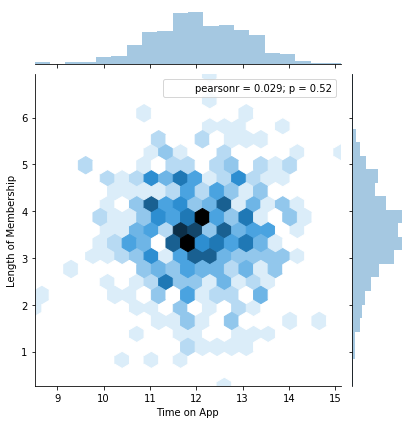

In [15]:
sns.jointplot(data=data,x=data['Time on App'],y=data['Length of Membership'],kind='hex')

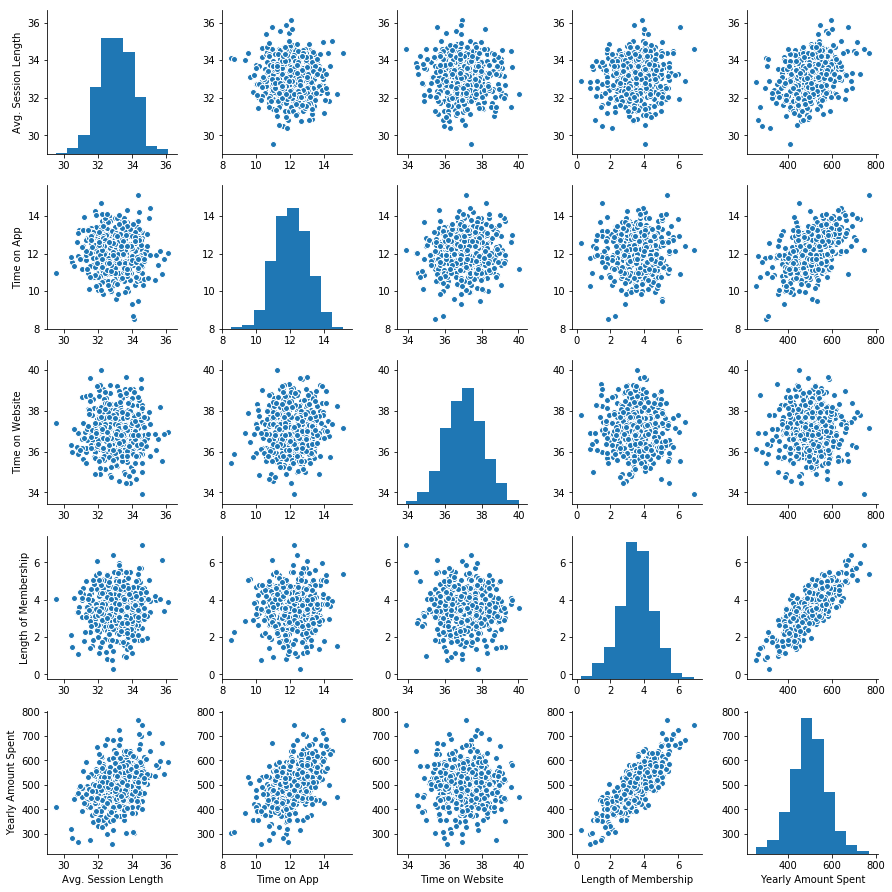

In [16]:
sns.pairplot(data)

Yearly Amount Spent and Length of Membership are correlated.

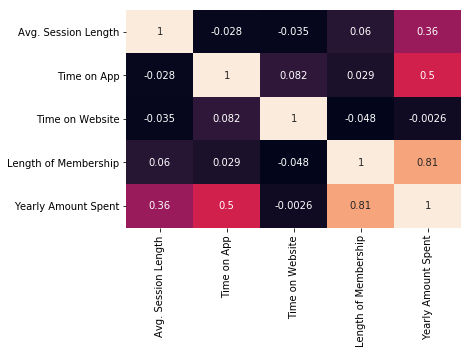

In [28]:
sns.heatmap(data.corr(),annot=True,cbar=False)

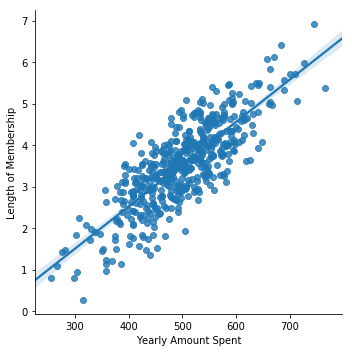

In [17]:
sns.lmplot(data=data,x='Yearly Amount Spent',y='Length of Membership')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [21]:
X = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = data['Yearly Amount Spent']

In [29]:
from sklearn.cross_validation import train_test_split

C:\Users\imroy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [54]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
reg.intercept_

-1047.9327822502387

In [57]:
cdf = reg.coef_

In [58]:
cdf = pd.DataFrame(cdf,X.columns,columns=['Coef.'])

In [59]:
cdf

,Coef.
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Prediction

In [60]:
pred = reg.predict(X_test)

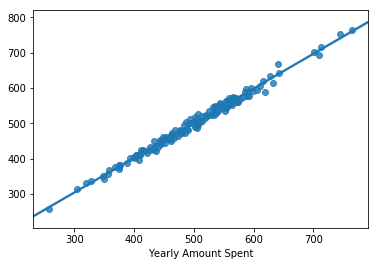

In [61]:
sns.regplot(y_test,pred)

In [65]:
MAE = np.mean(np.abs(y_test-pred))
MSE = np.mean((y_test-pred)**2)
RMSE = np.sqrt(MSE)

In [66]:
print(MAE)
print(MSE)
print(RMSE)

7.228148653430856
79.81305165097488
8.93381506698


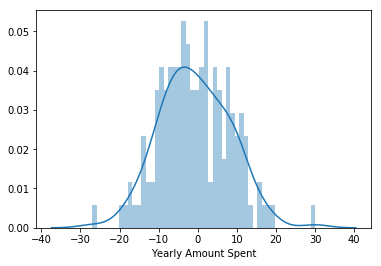

In [72]:
sns.distplot(y_test-pred,bins=50)